In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity
from math import sqrt

In [47]:
books1 = pd.read_csv('Books1.csv')

In [48]:
books = pd.read_csv('books_data.csv')

In [49]:
books.columns = ['id', 'title', 'author', 'description', 'genre', 'publication_date', 'cover_image_url', 'pages', 'rating']

In [50]:
books.head()

,id,title,author,description,genre,publication_date,cover_image_url,pages,rating
0,1,The Hunger Games,Suzanne Collins,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",09/14/08,https://i.gr-assets.com/images/S/compressed.ph...,374.0,4.33
1,2,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",There is a door at the end of a silent corrido...,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",09/28/04,https://i.gr-assets.com/images/S/compressed.ph...,870.0,4.50
2,3,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",05/23/06,https://i.gr-assets.com/images/S/compressed.ph...,324.0,4.28
3,4,Pride and Prejudice,"Jane Austen, Anna Quindlen (Introduction)",Alternate cover edition of ISBN 9780679783268S...,"['Classics', 'Fiction', 'Romance', 'Historical...",10/10/2000,https://i.gr-assets.com/images/S/compressed.ph...,279.0,4.26
4,5,Twilight,Stephenie Meyer,About three things I was absolutely positive.\...,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...",09/06/2006,https://i.gr-assets.com/images/S/compressed.ph...,501.0,3.60


In [51]:
# Concatenate the two datasets
books = pd.concat([books, books1], ignore_index=True)

# Combine the genres for each book
genres_combined = books['genre'].apply(lambda x: ' '.join(eval(x)))

In [52]:
# Create a TfidfVectorizer object to transform the book genres into a Tf-idf representation
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(genres_combined)

# Use TruncatedSVD for matrix factorization
svd = TruncatedSVD(n_components=50, random_state=42)
svd_matrix = svd.fit_transform(tfidf_matrix)

# Create a NearestNeighbors model
knn_model = NearestNeighbors(n_neighbors=15, metric='cosine')
knn_model.fit(svd_matrix)

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(books, test_size=0.2, random_state=42)

# Train the SVD model on the training set
svd.fit(tfidf_matrix)

# Make predictions on the test set
test_preds = svd.inverse_transform(svd.transform(tfidf_matrix[test_data.index]))

In [53]:
cosine_rmse = sqrt(mean_squared_error(cosine_similarity(tfidf_matrix[test_data.index]), cosine_similarity(test_preds)))
print(f"RMSE for Cosine Similarity: {cosine_rmse}")

RMSE for Cosine Similarity: 0.062173232010825114


In [54]:
svd_rmse = sqrt(mean_squared_error(tfidf_matrix[test_data.index].toarray(), test_preds))
print(f"RMSE for SVD: {svd_rmse}")

RMSE for SVD: 0.02578274624356712


In [55]:
results = pd.DataFrame({
    'Method': ['Cosine Similarity', 'SVD'],
    'RMSE': [cosine_rmse, svd_rmse]
})

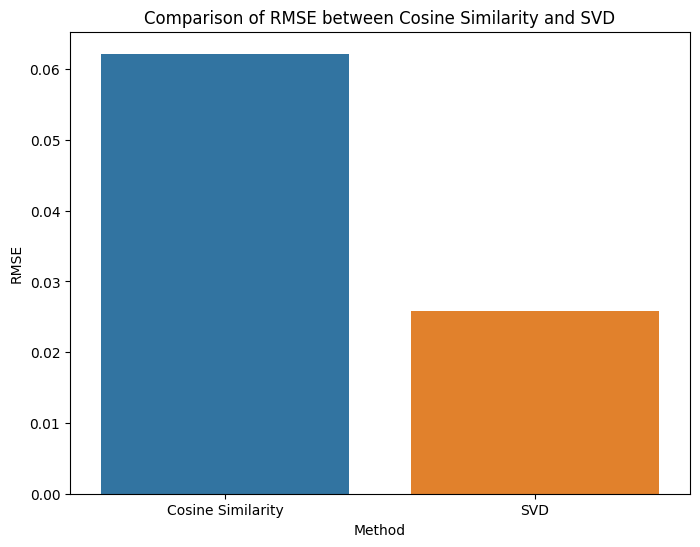

In [56]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Method', y='RMSE', data=results)
plt.title('Comparison of RMSE between Cosine Similarity and SVD')
plt.ylabel('RMSE')
plt.show()


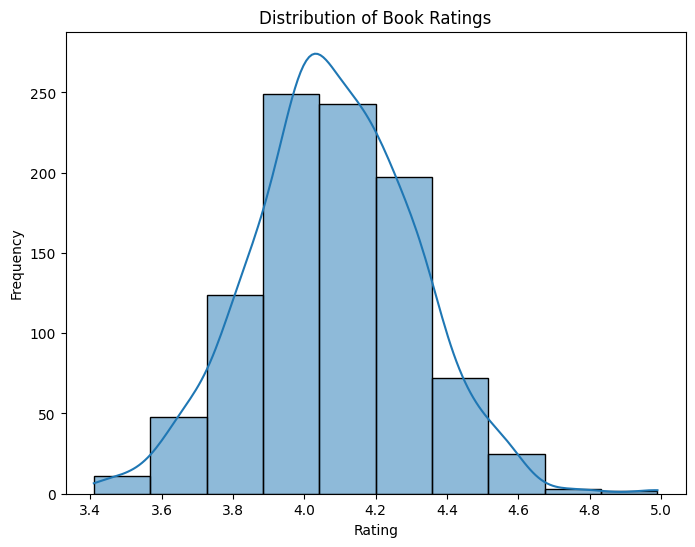

In [57]:
plt.figure(figsize=(8, 6))
sns.histplot(books['rating'], bins=10, kde=True)
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

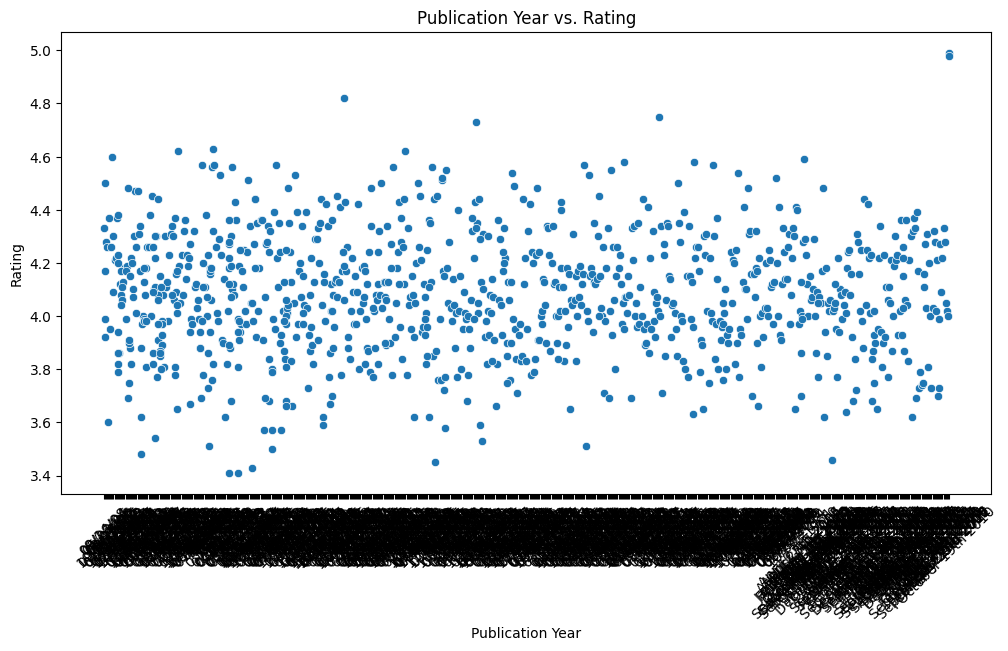

In [58]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='publication_date', y='rating', data=books)
plt.title('Publication Year vs. Rating')
plt.xlabel('Publication Year')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()